<a href="https://colab.research.google.com/github/RareDiseaseData/Meta-analysis-data/blob/main/Hyl%20patient%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to the notebook that contains the data analysis for hydorxylysine percentage in OI patient

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data importing

In [102]:
df_unfilted = pd.read_csv("/content/Hyl_Patient_data.csv")
df_unfilted

,ID,Author,Year,Title,Cell1,Cell2,Age,Sex,Type,n,...,Method,Control vs patient vs aggregate,Measurement,%hydroxylysine_ind,%hydroxylysine_per_n1,%hydoxylation_per_n2,STD_n1,STD_n2,STD simulated from regression,STD combined
0,6,"Bleckmann, H.;Kresse, H.;Wollensak, J.;Buddeck...",1971,[Glycosaminoglycan and collagen analyses in os...,2,2,2,1,9,1.0,...,1,1,1,0.465116,NaN,NaN,NaN,NaN,0.093500,NaN
1,8,"Eastoe, J. E.;Martens, P.;Thomas, N. R.",1973,The amino-acid composition of human hard tissu...,2,3,1,1,2,1.0,...,2,1,1,0.219020,NaN,NaN,NaN,NaN,0.083326,NaN
2,15,"Trelstad, R. L.;Rubin, D.;Gross, J.",1977,Osteogenesis imperfecta congenita: evidence fo...,1,1,1,2,2,3.0,...,5,1,1,0.218750,0.314373,0.314373,0.00587,0.00587,NaN,NaN
3,15,"Trelstad, R. L.;Rubin, D.;Gross, J.",1977,Osteogenesis imperfecta congenita: evidence fo...,2,2,1,2,2,NaN,...,3,1,1,0.371429,NaN,NaN,NaN,NaN,0.041000,NaN
4,15,"Trelstad, R. L.;Rubin, D.;Gross, J.",1978,Osteogenesis imperfecta congenita: evidence fo...,2,3,1,2,2,NaN,...,3,1,1,0.352941,NaN,NaN,NaN,NaN,0.037900,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,158,"Lehmann, H. W.;Rimek, D.;Bodo, M.;Brenner, R. ...",1995,Hydroxylation of collagen type I: evidence tha...,1,1,5,3,4,NaN,...,5,1,1,0.370504,NaN,NaN,NaN,NaN,0.044100,NaN
65,158,"Lehmann, H. W.;Rimek, D.;Bodo, M.;Brenner, R. ...",1995,Hydroxylation of collagen type I: evidence tha...,1,1,5,3,4,NaN,...,5,1,1,0.412710,NaN,NaN,NaN,NaN,0.051200,NaN
66,158,"Lehmann, H. W.;Rimek, D.;Bodo, M.;Brenner, R. ...",1995,Hydroxylation of collagen type I: evidence tha...,1,1,5,3,4,NaN,...,5,1,1,0.423261,NaN,NaN,NaN,NaN,0.053000,NaN
67,158,"Lehmann, H. W.;Rimek, D.;Bodo, M.;Brenner, R. ...",1995,Hydroxylation of collagen type I: evidence tha...,1,1,5,3,4,NaN,...,5,1,1,0.425180,NaN,NaN,NaN,NaN,0.053300,NaN


In [ ]:
df_unfilted.columns

Index(['ID', 'Author', 'Year', 'Title', 'Cell1', 'Cell2', 'Age', 'Sex', 'Type',
       'n', 'n2', 'Contains std', 'type of comparaison', 'Method',
       'Control vs patient vs aggregate', 'Measurement', '%hydroxylysine_ind',
       '%hydroxylysine_per_n1', '%hydoxylation_per_n2', 'STD_n1', 'STD_n2',
       'STD simulated from regression', 'STD combined'],
      dtype='object')

# Descriptive stats

In [ ]:
df_des = df_unfilted[["Cell1", "Type", "n", "Method", "%hydroxylysine_ind", "%hydroxylysine_per_n1","STD_n1","STD_n2"]]
df_des #Create dataframe with appropriate variables

,Cell1,Type,n,Method,%hydroxylysine_ind,%hydroxylysine_per_n1,STD_n1,STD_n2
0,2,9,1.0,1,0.465116,NaN,NaN,NaN
1,2,2,1.0,2,0.219020,NaN,NaN,NaN
2,1,2,3.0,5,0.218750,0.314373,0.00587,0.00587
3,2,2,NaN,3,0.371429,NaN,NaN,NaN
4,2,2,NaN,3,0.352941,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
64,1,4,NaN,5,0.370504,NaN,NaN,NaN
65,1,4,NaN,5,0.412710,NaN,NaN,NaN
66,1,4,NaN,5,0.423261,NaN,NaN,NaN
67,1,4,NaN,5,0.425180,NaN,NaN,NaN


In [ ]:
#Mean and standard deviation per group
grouped1 = df_des.groupby(['Cell1']).agg(['mean', 'std'])['%hydroxylysine_ind']
grouped2 = df_des.groupby(['Type']).agg(['mean', 'std'])['%hydroxylysine_ind']
grouped3 = df_des.groupby(['Method']).agg(['mean', 'std'])['%hydroxylysine_ind']
print(grouped1, grouped2, grouped3)

           mean       std
Cell1                    
1      0.345038  0.106355
2      0.252388  0.094568           mean       std
Type                    
1     0.265991  0.108692
2     0.350116  0.106685
3     0.328320  0.120298
4     0.328815  0.101973
9     0.296495  0.119687             mean       std
Method                    
1       0.465116       NaN
2       0.219020       NaN
3       0.231887  0.076739
5       0.348188  0.096520
6       0.626000       NaN
7       0.360000       NaN


In [ ]:
# Define the columns to group by
group_columns = ['Cell1', 'Type', 'Method']

# Use a for loop to group the data and calculate summary statistics for each column
for column in group_columns:
    grouped = df_des.groupby(column)['%hydroxylysine_ind'].describe()
    print(f"Summary statistics for column '{column}':\n{grouped.transpose()}\n")

Summary statistics for column 'Cell1':
Cell1          1          2
count  53.000000  16.000000
mean    0.345038   0.252388
std     0.106355   0.094568
min     0.121188   0.114455
25%     0.291847   0.201428
50%     0.349400   0.255873
75%     0.405995   0.288673
max     0.626000   0.465116

Summary statistics for column 'Type':
Type          1          2          3          4         9
count  9.000000  19.000000  17.000000  18.000000  6.000000
mean   0.265991   0.350116   0.328320   0.328815  0.296495
std    0.108692   0.106685   0.120298   0.101973  0.119687
min    0.129901   0.218750   0.114455   0.121188  0.151000
25%    0.136000   0.276467   0.252078   0.268106  0.207250
50%    0.299520   0.324460   0.305276   0.346043  0.300500
75%    0.322542   0.400120   0.388729   0.402158  0.364390
max    0.405995   0.626000   0.539329   0.500959  0.465116

Summary statistics for column 'Method':
Method         1        2          3          5      6     7
count   1.000000  1.00000  17.000000 

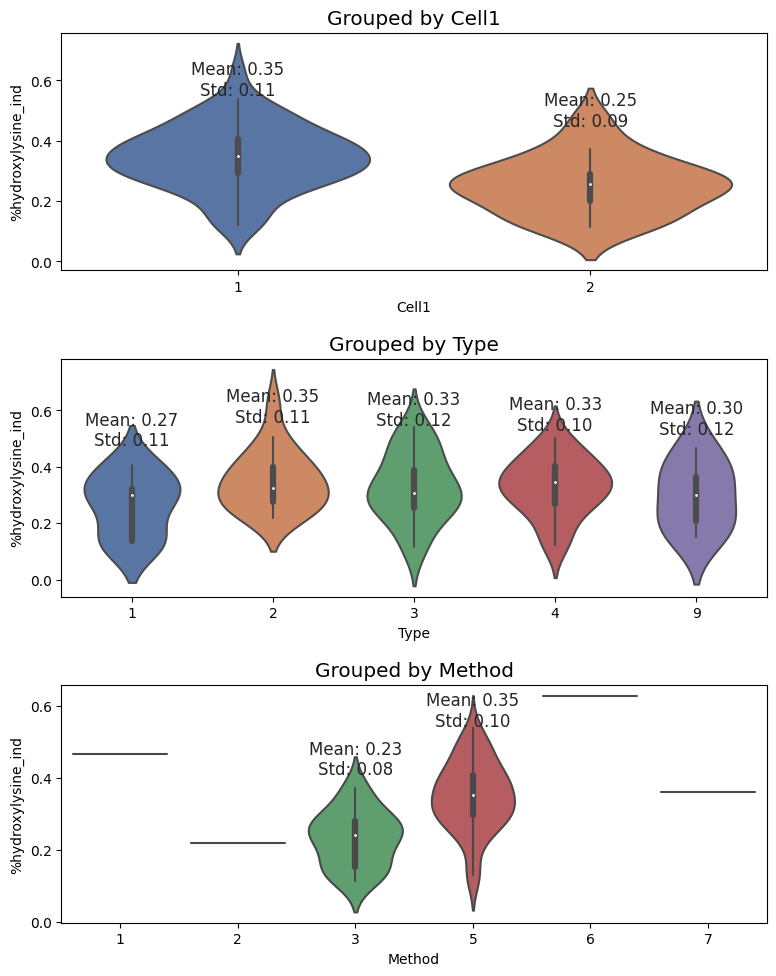

In [ ]:
# Group the data by the three categorical variables and calculate the mean and std
grouped_bycell = df_des.groupby('Cell1')['%hydroxylysine_ind'].agg([np.mean, np.std])
grouped_bytype = df_des.groupby('Type')['%hydroxylysine_ind'].agg([np.mean, np.std])
grouped_bymethod = df_des.groupby('Method')['%hydroxylysine_ind'].agg([np.mean, np.std])

# Create a figure with three subplots arranged vertically
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))

# Set the font size for the plots
sns.set(font_scale=1.2)

# Create a violin plot for each group in each categorical variable
sns.violinplot(x='Cell1', y='%hydroxylysine_ind', data=df_des, ax=axes[0])
sns.violinplot(x='Type', y='%hydroxylysine_ind', data=df_des, ax=axes[1])
sns.violinplot(x='Method', y='%hydroxylysine_ind', data=df_des, ax=axes[2])

# Add the mean and standard deviation as text annotations above each violin plot
for ax, grouped_data in zip(axes, [grouped_bycell, grouped_bytype, grouped_bymethod]):
    for i, (index, row) in enumerate(grouped_data.iterrows()):
        mean = row['mean']
        std = row['std']
        ax.text(i, mean + std + 0.1, f"Mean: {mean:.2f}\nStd: {std:.2f}", 
                horizontalalignment='center', fontsize=12)

# Set the axis labels and title for each subplot
axes[0].set_ylabel('%hydroxylysine_ind')
axes[1].set_ylabel('%hydroxylysine_ind')
axes[2].set_ylabel('%hydroxylysine_ind')
axes[0].set_title('Grouped by Cell1')
axes[1].set_title('Grouped by Type')
axes[2].set_title('Grouped by Method')

# Adjust the spacing between the subplots
fig.tight_layout()

# Show the plot
plt.show()

In [ ]:
# winthin stidy variance is signigficanly lower than than global variance. I have shown that categorical variance is similar to global variance.
# If we decide with conservative estimate, applying std to individual patient data based on the winthin study variance is not conservative

global_variance = df_des['%hydroxylysine_ind'].std()
winthin_study_variance1 = df_des['STD_n1'].mean()
winthin_study_variance2 = df_des['STD_n2'].mean() # this standard deviation is based on study with multiple OI type, so the std within study, within OI type

print(global_variance,winthin_study_variance1, winthin_study_variance2)

0.11033564355789746 0.021757910076923077 0.029760165647058825


# kmeans Clustering to demonstrate that categorical aggregation is not that bad

In [72]:
from sklearn.cluster import KMeans

w = df_unfilted['%hydroxylysine_ind'].values.reshape(-1, 1)
kmeans = KMeans(n_clusters=4)
kmeans.fit(w)
df_unfilted['cluster_label'] = kmeans.labels_
df_unfilted

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,ID,Author,Year,Title,Cell1,Cell2,Age,Sex,Type,n,...,Control vs patient vs aggregate,Measurement,%hydroxylysine_ind,%hydroxylysine_per_n1,%hydoxylation_per_n2,STD_n1,STD_n2,STD simulated from regression,STD combined,cluster_label
0,6,"Bleckmann, H.;Kresse, H.;Wollensak, J.;Buddeck...",1971,[Glycosaminoglycan and collagen analyses in os...,2,2,2,1,9,1.0,...,1,1,0.465116,NaN,NaN,NaN,NaN,0.093500,NaN,0
1,8,"Eastoe, J. E.;Martens, P.;Thomas, N. R.",1973,The amino-acid composition of human hard tissu...,2,3,1,1,2,1.0,...,1,1,0.219020,NaN,NaN,NaN,NaN,0.083326,NaN,1
2,15,"Trelstad, R. L.;Rubin, D.;Gross, J.",1977,Osteogenesis imperfecta congenita: evidence fo...,1,1,1,2,2,3.0,...,1,1,0.218750,0.314373,0.314373,0.00587,0.00587,NaN,NaN,1
3,15,"Trelstad, R. L.;Rubin, D.;Gross, J.",1977,Osteogenesis imperfecta congenita: evidence fo...,2,2,1,2,2,NaN,...,1,1,0.371429,NaN,NaN,NaN,NaN,0.041000,NaN,2
4,15,"Trelstad, R. L.;Rubin, D.;Gross, J.",1978,Osteogenesis imperfecta congenita: evidence fo...,2,3,1,2,2,NaN,...,1,1,0.352941,NaN,NaN,NaN,NaN,0.037900,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,158,"Lehmann, H. W.;Rimek, D.;Bodo, M.;Brenner, R. ...",1995,Hydroxylation of collagen type I: evidence tha...,1,1,5,3,4,NaN,...,1,1,0.370504,NaN,NaN,NaN,NaN,0.044100,NaN,2
65,158,"Lehmann, H. W.;Rimek, D.;Bodo, M.;Brenner, R. ...",1995,Hydroxylation of collagen type I: evidence tha...,1,1,5,3,4,NaN,...,1,1,0.412710,NaN,NaN,NaN,NaN,0.051200,NaN,2
66,158,"Lehmann, H. W.;Rimek, D.;Bodo, M.;Brenner, R. ...",1995,Hydroxylation of collagen type I: evidence tha...,1,1,5,3,4,NaN,...,1,1,0.423261,NaN,NaN,NaN,NaN,0.053000,NaN,2
67,158,"Lehmann, H. W.;Rimek, D.;Bodo, M.;Brenner, R. ...",1995,Hydroxylation of collagen type I: evidence tha...,1,1,5,3,4,NaN,...,1,1,0.425180,NaN,NaN,NaN,NaN,0.053300,NaN,2


In [74]:
df_unfilted.groupby("cluster_label")['%hydroxylysine_ind'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster_label,,,,,,,,
0,10.0,0.501246,0.050400,0.453957,0.469544,0.491367,0.503837,0.626000
1,29.0,0.275909,0.034156,0.217877,0.252078,0.281250,0.303569,0.324460
2,21.0,0.382682,0.027438,0.342686,0.360000,0.380096,0.400240,0.435731
3,9.0,0.141675,0.023809,0.114455,0.129901,0.136000,0.151000,0.196000


In [75]:
df_unfilted.groupby("Type")['%hydroxylysine_ind'].describe()

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
1,9.0,0.265991,0.108692,0.129901,0.136000,0.299520,0.322542,0.405995
2,19.0,0.350116,0.106685,0.218750,0.276467,0.324460,0.400120,0.626000
3,17.0,0.328320,0.120298,0.114455,0.252078,0.305276,0.388729,0.539329
4,18.0,0.328815,0.101973,0.121188,0.268106,0.346043,0.402158,0.500959
9,6.0,0.296495,0.119687,0.151000,0.207250,0.300500,0.364390,0.465116


# Anova Table to determine the categorical effect on outcome. (not done properly)

In [ ]:
df_anova = df_unfilted[[
    "Cell1",
    "Type",
    "Method",
    "%hydroxylysine_ind"
    ]]
df_anova

,Cell1,Type,Method,%hydroxylysine_ind
0,2,9,1,0.465116
1,2,2,2,0.219020
2,1,2,5,0.218750
3,2,2,3,0.371429
4,2,2,3,0.352941
...,...,...,...,...
64,1,4,5,0.370504
65,1,4,5,0.412710
66,1,4,5,0.423261
67,1,4,5,0.425180


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming your dataset has 3 categorical variables A, B, C and 1 continuous variable Y
model = ols('%hydroxylysine_ind ~ Cell1 + Type + Method', data=df_anova).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA table
print(anova_table)

AssertionError: ignored

In [ ]:
# Calculate eta-squared
eta_squared = anova_table['sum_sq']/sum(anova_table['sum_sq'])

# Print eta-squared for each categorical variable
print(eta_squared)

# Grubbs Test, outlier removal 
needs to be discussed

# KNN for completing missing OI type
I don't know if I need to do 1 hot encoding
Something if wrong with the encoding of the OI type, I am sure that it is scalling the types

In [ ]:
df_knn = df_unfilted[[
    "Cell1",
    "Type",
    "Method",
    "%hydroxylysine_ind"
]]
df_knn

,Cell1,Type,Method,%hydroxylysine_ind
0,2,9,1,0.465116
1,2,2,2,0.219020
2,1,2,5,0.218750
3,2,2,3,0.371429
4,2,2,3,0.352941
...,...,...,...,...
64,1,4,5,0.370504
65,1,4,5,0.412710
66,1,4,5,0.423261
67,1,4,5,0.425180


In [ ]:
unknown_severity = df_knn[df_knn['Type']==9]
unknown_severity

,Cell1,Type,Method,%hydroxylysine_ind
0,2,9,1,0.465116
13,1,9,5,0.365854
24,1,9,3,0.241000
25,1,9,3,0.196000
26,1,9,3,0.151000
29,1,9,7,0.360000


In [ ]:
known_severity = df_knn[df_knn['Type']!=9]
known_severity

,Cell1,Type,Method,%hydroxylysine_ind
1,2,2,2,0.219020
2,1,2,5,0.218750
3,2,2,3,0.371429
4,2,2,3,0.352941
5,1,2,5,0.294000
...,...,...,...,...
64,1,4,5,0.370504
65,1,4,5,0.412710
66,1,4,5,0.423261
67,1,4,5,0.425180


In [ ]:
known_severity["Type"] =  known_severity['Type'].replace({1: 0, 2: 1, 3: 2, 4: 3})
known_severity

<ipython-input-62-855aed82e42a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  known_severity["Type"] =  known_severity['Type'].replace({1: 0, 2: 1, 3: 2, 4: 3})


,Cell1,Type,Method,%hydroxylysine_ind
1,2,1,2,0.219020
2,1,1,5,0.218750
3,2,1,3,0.371429
4,2,1,3,0.352941
5,1,1,5,0.294000
...,...,...,...,...
64,1,3,5,0.370504
65,1,3,5,0.412710
66,1,3,5,0.423261
67,1,3,5,0.425180


In [66]:
#Train-Test split model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x1 = known_severity.drop('Type', axis=1)
y1 = known_severity['Type']
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.5, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x1_train, y1_train)

y1_pred = knn.predict(x1_test)
accuracy1 = accuracy_score(y1_test, y1_pred)
print("Accuracy:", accuracy1)

Accuracy: 0.21875


In [67]:
#Train-Test split model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x2 = known_severity.drop('Type', axis=1)
y2 = known_severity['Type']
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x2_train, y2_train)

y2_pred = knn.predict(x2_test)
accuracy2 = accuracy_score(y2_test, y2_pred)
print("Accuracy:", accuracy2)

Accuracy: 0.3157894736842105


In [69]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb

x3 = known_severity.drop('Type', axis=1)
y3 = known_severity['Type']
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.5, random_state=42)

xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(x3_train, y3_train)
y3_pred = xgb_cl.predict(x3_test)
accuracy3 = accuracy_score(y3_test, y3_pred)
print("Accuracy:", accuracy3)

Accuracy: 0.25


In [70]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb

x4 = known_severity.drop('Type', axis=1)
y4 = known_severity['Type']
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.3, random_state=42)

xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(x4_train, y4_train)
y4_pred = xgb_cl.predict(x4_test)
accuracy4 = accuracy_score(y4_test, y4_pred)
print("Accuracy:", accuracy4)

Accuracy: 0.42105263157894735


# Regression 1

In [103]:
df_reg1 = df_unfilted[[
    "Cell1",
    "Type",
    "n",
    "Method",
    "%hydroxylysine_ind",
    "%hydroxylysine_per_n1",
    "STD_n1"
]]
df_reg1

,Cell1,Type,n,Method,%hydroxylysine_ind,%hydroxylysine_per_n1,STD_n1
0,2,9,1.0,1,0.465116,NaN,NaN
1,2,2,1.0,2,0.219020,NaN,NaN
2,1,2,3.0,5,0.218750,0.314373,0.00587
3,2,2,NaN,3,0.371429,NaN,NaN
4,2,2,NaN,3,0.352941,NaN,NaN
...,...,...,...,...,...,...,...
64,1,4,NaN,5,0.370504,NaN,NaN
65,1,4,NaN,5,0.412710,NaN,NaN
66,1,4,NaN,5,0.423261,NaN,NaN
67,1,4,NaN,5,0.425180,NaN,NaN


In [104]:
df_reg1.Type = df_reg1.Type.astype(int)
df_reg1.Method = df_reg1.Method.astype(int)
df_Type_dummies = pd.get_dummies(df_reg1.Type, prefix='Type')
df_Method_dummies = pd.get_dummies(df_reg1.Method, prefix='Method')
df_reg1.join(df_Type_dummies).join(df_Method_dummies)
df_reg2 = df_reg1.join(df_Type_dummies).join(df_Method_dummies)
df_reg2

<ipython-input-104-1d9945f5df65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg1.Type = df_reg1.Type.astype(int)
<ipython-input-104-1d9945f5df65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg1.Method = df_reg1.Method.astype(int)


,Cell1,Type,n,Method,%hydroxylysine_ind,%hydroxylysine_per_n1,STD_n1,Type_1,Type_2,Type_3,Type_4,Type_9,Method_1,Method_2,Method_3,Method_5,Method_6,Method_7
0,2,9,1.0,1,0.465116,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0
1,2,2,1.0,2,0.219020,NaN,NaN,0,1,0,0,0,0,1,0,0,0,0
2,1,2,3.0,5,0.218750,0.314373,0.00587,0,1,0,0,0,0,0,0,1,0,0
3,2,2,NaN,3,0.371429,NaN,NaN,0,1,0,0,0,0,0,1,0,0,0
4,2,2,NaN,3,0.352941,NaN,NaN,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,4,NaN,5,0.370504,NaN,NaN,0,0,0,1,0,0,0,0,1,0,0
65,1,4,NaN,5,0.412710,NaN,NaN,0,0,0,1,0,0,0,0,1,0,0
66,1,4,NaN,5,0.423261,NaN,NaN,0,0,0,1,0,0,0,0,1,0,0
67,1,4,NaN,5,0.425180,NaN,NaN,0,0,0,1,0,0,0,0,1,0,0


In [105]:
#df_reg2 = df_reg2.drop("Type",axis =1)
df_reg2 = df_reg2.drop("Method",axis =1)
df_reg2

,Cell1,Type,n,%hydroxylysine_ind,%hydroxylysine_per_n1,STD_n1,Type_1,Type_2,Type_3,Type_4,Type_9,Method_1,Method_2,Method_3,Method_5,Method_6,Method_7
0,2,9,1.0,0.465116,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0
1,2,2,1.0,0.219020,NaN,NaN,0,1,0,0,0,0,1,0,0,0,0
2,1,2,3.0,0.218750,0.314373,0.00587,0,1,0,0,0,0,0,0,1,0,0
3,2,2,NaN,0.371429,NaN,NaN,0,1,0,0,0,0,0,1,0,0,0
4,2,2,NaN,0.352941,NaN,NaN,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,4,NaN,0.370504,NaN,NaN,0,0,0,1,0,0,0,0,1,0,0
65,1,4,NaN,0.412710,NaN,NaN,0,0,0,1,0,0,0,0,1,0,0
66,1,4,NaN,0.423261,NaN,NaN,0,0,0,1,0,0,0,0,1,0,0
67,1,4,NaN,0.425180,NaN,NaN,0,0,0,1,0,0,0,0,1,0,0


In [106]:
df_train = df_reg2.dropna(subset=['STD_n1'])
df_train

,Cell1,Type,n,%hydroxylysine_ind,%hydroxylysine_per_n1,STD_n1,Type_1,Type_2,Type_3,Type_4,Type_9,Method_1,Method_2,Method_3,Method_5,Method_6,Method_7
2,1,2,3.0,0.218750,0.314373,0.005870,0,1,0,0,0,0,0,0,1,0,0
5,1,2,2.0,0.294000,0.287625,0.009016,0,1,0,0,0,0,0,0,1,0,0
7,2,3,4.0,0.252078,0.253333,0.027212,0,0,1,0,0,0,0,1,0,0,0
15,1,1,3.0,0.129901,0.129901,0.008515,1,0,0,0,0,0,0,0,1,0,0
16,1,2,5.0,0.260990,0.260990,0.015050,0,1,0,0,0,0,0,0,1,0,0
17,1,3,12.0,0.140198,0.140198,0.020990,0,0,1,0,0,0,0,0,1,0,0
18,1,4,3.0,0.121188,0.121188,0.010495,0,0,0,1,0,0,0,0,1,0,0
19,2,1,3.0,0.134257,0.134257,0.010693,1,0,0,0,0,0,0,1,0,0,0
20,2,2,5.0,0.271683,0.271683,0.021782,0,1,0,0,0,0,0,1,0,0,0
21,2,3,12.0,0.114455,0.114455,0.016634,0,0,1,0,0,0,0,1,0,0,0


In [98]:
df_train.columns

Index(['Cell1', 'n', '%hydroxylysine_ind', '%hydroxylysine_per_n1', 'STD_n1',
       'Type_1', 'Type_2', 'Type_3', 'Type_4', 'Type_9', 'Method_1',
       'Method_2', 'Method_3', 'Method_5', 'Method_6', 'Method_7'],
      dtype='object')

In [107]:
#do i remove n
w = df_train[[
    "Cell1",
    "%hydroxylysine_per_n1",
    "Type_1",
    "Type_2",
    "Type_3",
    "Type_4",
    "Type_9",
    "Method_1",
    "Method_2",
    "Method_3",
    "Method_5",
    "Method_6",
    "Method_7"
]]
w

,Cell1,%hydroxylysine_per_n1,Type_1,Type_2,Type_3,Type_4,Type_9,Method_1,Method_2,Method_3,Method_5,Method_6,Method_7
2,1,0.314373,0,1,0,0,0,0,0,0,1,0,0
5,1,0.287625,0,1,0,0,0,0,0,0,1,0,0
7,2,0.253333,0,0,1,0,0,0,0,1,0,0,0
15,1,0.129901,1,0,0,0,0,0,0,0,1,0,0
16,1,0.260990,0,1,0,0,0,0,0,0,1,0,0
17,1,0.140198,0,0,1,0,0,0,0,0,1,0,0
18,1,0.121188,0,0,0,1,0,0,0,0,1,0,0
19,2,0.134257,1,0,0,0,0,0,0,1,0,0,0
20,2,0.271683,0,1,0,0,0,0,0,1,0,0,0
21,2,0.114455,0,0,1,0,0,0,0,1,0,0,0


In [109]:
u = df_train[["STD_n1"]]
u

,STD_n1
2,0.005870
5,0.009016
7,0.027212
15,0.008515
16,0.015050
17,0.020990
18,0.010495
19,0.010693
20,0.021782
21,0.016634


In [110]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X = w, y = u)

LinearRegression()

In [111]:
reg.coef_

array([[-0.00946457,  0.22563636,  0.00717361, -0.02913783,  0.00565965,
         0.00248673,  0.01381785,  0.        ,  0.        ,  0.00435328,
        -0.00435328,  0.        ,  0.        ]])

In [112]:
reg.intercept_

array([-0.00793128])

In [113]:
new_x = df_reg2[df_reg2.n==1]
new_x

,Cell1,Type,n,%hydroxylysine_ind,%hydroxylysine_per_n1,STD_n1,Type_1,Type_2,Type_3,Type_4,Type_9,Method_1,Method_2,Method_3,Method_5,Method_6,Method_7
0,2,9,1.0,0.465116,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0
1,2,2,1.0,0.219020,NaN,NaN,0,1,0,0,0,0,1,0,0,0,0
11,2,2,1.0,0.303569,NaN,NaN,0,1,0,0,0,0,0,1,0,0,0
12,1,2,1.0,0.400000,NaN,NaN,0,1,0,0,0,0,0,0,1,0,0
13,1,9,1.0,0.365854,NaN,NaN,0,0,0,0,1,0,0,0,1,0,0
14,2,2,1.0,0.223080,NaN,NaN,0,1,0,0,0,0,0,1,0,0,0
23,1,3,1.0,0.297000,NaN,NaN,0,0,1,0,0,0,0,0,1,0,0
27,1,2,1.0,0.626000,NaN,NaN,0,1,0,0,0,0,0,0,0,1,0
28,2,1,1.0,0.136000,NaN,NaN,1,0,0,0,0,0,0,1,0,0,0
29,1,9,1.0,0.360000,NaN,NaN,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
#I realise there is an issue with the way to wrote my %hydroxylysine
reg.predict(new_X)